In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Campus Data_Corrected_21 Nov.xlsx')

In [3]:
df.drop(columns=['Sl. No','Batch','ID','Orchard Stream','University location','Specialization'],inplace=True)

In [4]:
df['Batch-Year'] = df.Batch1.apply(lambda x : str(x).split('-')[0])
df['Batch-Month'] = df.Batch1.apply(lambda x : str(x).split('-')[1])

In [5]:
df.drop(columns=['Batch1'],inplace=True)

In [6]:
df['Gender'] = df.Gender.map({'Mr':0, 'Ms':1})

In [7]:
df['Orchard Stream1'].fillna(value='Others',inplace=True)

In [8]:
df['Orchard Performance'].fillna(value='Others',inplace=True)
df['Orchard Performance'].replace({0:'Others'},inplace=True)
df['Orchard Performance'] = df['Orchard Performance'].map({'Bottom Performer':0,'Average Performer':1,
                                                          'Top Performer':3,'Above Average':2,'Others':4})

In [9]:
top_50_inst = df['Institution'].value_counts().head(50)
df_inst = pd.DataFrame(top_50_inst)
df_inst['Institution'] = df_inst.index
df_inst.reset_index(inplace=True,drop=True)

In [10]:
df['Region'].replace({'east':'East',0:'Others','Telangana':'Others'},inplace=True)
df['Region'].fillna(value='Others',inplace=True)

In [11]:
df['Specialization1'].replace({'99999':'Others','Other':'Others'},inplace=True)

In [12]:
df['Resgined'] = df["Resigned on"].isnull()
df['Resgined'] = df.Resgined.map(lambda x: 1 if x else 0)
df.drop(columns=['Resigned on'],inplace=True)

In [13]:
df['Type'].fillna(value='Others',inplace=True)
df['Type'].replace({'Voluntary':0,'InVoluntary':1,'Others':2},inplace=True)

In [14]:
df['Resignation status'].fillna(value='Others',inplace=True)
df['Resignation status'].replace({'Pending Manager Approval':0,'Pending PF Approval':1,'Resignation Accepted':2,
                                 'Revoked':3,'Saved by Manager':4,'Pending_PF_RevokedApproval':5,
                                 'Others':6},inplace=True)

In [15]:
df['Resignation details'].fillna(value='Others',inplace=True)

In [16]:
df['Annual Rating 18'].fillna(value=0,inplace=True)
df['Annual Rating 18'].replace({'Unrated':0,'MindtreeMind Default':0,'Long Leave Default':0},inplace=True)

In [17]:
df['Annual rating 17'].fillna(value=0,inplace=True)
df['Annual rating 17'].replace({'Unrated':0,5.5:5},inplace=True)

In [18]:
df['Anniversary Cycle'].fillna(value='Others',inplace=True)

In [19]:
df['Anniversary rating'].replace({'Unrated':0},inplace=True)
df['Anniversary rating'].fillna(value=0,inplace=True)

In [20]:
df['Location'].fillna(value='Others',inplace=True)

In [21]:
df['Practice'].fillna(value='Others',inplace=True)
df['Practice'].replace({0:'Others'},inplace=True)

In [22]:
df['Sub Practice'].fillna(value='Others',inplace=True)
df['Sub Practice'].replace({0:'Others'},inplace=True)

In [23]:
df['Vertical'].fillna(value='Others',inplace=True)
df['Vertical'].replace({0:'Others'},inplace=True)

In [24]:
df['Customer'].fillna(value='Others',inplace=True)

In [25]:
df['Campus Tag'].fillna(value='Others',inplace=True)
df['Campus Tag'].replace({0:'Others'},inplace=True)

In [26]:
df['Status'].fillna(value='Others',inplace=True)

In [27]:
df['People Owner'].fillna(value='Others',inplace=True)

In [28]:
df['Competency'].fillna(value='Others',inplace=True)
df['Competency'].replace({'C1':0,'C2':1,'C3':2,'Others':3},inplace=True)

In [29]:
df['Tenure'].fillna(value=0,inplace=True)
df['Tenure'].value_counts()
df.Tenure = df.Tenure.astype(int)
df.loc[(df.Tenure > 1)&(df.Tenure <=11), 'Tenure']=0
df.loc[(df.Tenure > 11)&(df.Tenure <=22), 'Tenure']=1
df.loc[(df.Tenure > 22)&(df.Tenure <=33), 'Tenure']=2
df.loc[(df.Tenure > 33)&(df.Tenure <=44), 'Tenure']=3
df.loc[(df.Tenure > 44)&(df.Tenure==0),'Tenure']=5

In [30]:
df['Primary Skills'].fillna(value='Others',inplace=True)
df['Primary Skills'].replace({0:'Others'},inplace=True)

In [31]:
df['Billability'].fillna(value='Others',inplace=True)

In [32]:
df.columns

Index(['MID', 'Gender', 'First name', 'Last name', 'Full name',
       'Orchard Stream1', 'Orchard Performance', 'Institution',
       'University location1', 'State', 'Region', 'Specialization1', 'Type',
       'Resignation status', 'Resignation details', 'Annual Rating 18',
       'Annual rating 17', 'Anniversary Cycle', 'Anniversary rating',
       'Location', 'Practice', 'Sub Practice', 'Vertical', 'Customer',
       'Campus Tag', 'Status', 'People Owner', 'Competency', 'Tenure',
       'Primary Skills', 'Billability', 'Batch-Year', 'Batch-Month',
       'Resgined'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 34 columns):
MID                     3749 non-null object
Gender                  3749 non-null int64
First name              3749 non-null object
Last name               3714 non-null object
Full name               3749 non-null object
Orchard Stream1         3749 non-null object
Orchard Performance     3749 non-null int64
Institution             3749 non-null object
University location1    3749 non-null object
State                   3749 non-null object
Region                  3749 non-null object
Specialization1         3749 non-null object
Type                    3749 non-null int64
Resignation status      3749 non-null int64
Resignation details     3749 non-null object
Annual Rating 18        3749 non-null float64
Annual rating 17        3749 non-null float64
Anniversary Cycle       3749 non-null object
Anniversary rating      3749 non-null float64
Location                3749 non-null o

In [34]:
df.drop(columns=['MID','First name','Last name','Full name'],inplace=True)

In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
#df.iloc[:,[1,3,4,5,7,9,12,14,15,16,17,18,19,20,21,24,25,26,27]] = le.fit_transform(df.iloc[:,[1,3,4,5,7,9,12,14,15,16,17,18,19,20,21,24,25,26,27]])

In [59]:
#df.iloc[:,[1,3,4,5,7,9,12,14,15,16,17,18,19,20,21,24,25,26,27]].apply(le.fit_transform)
df.head()
df.to_excel('powerBIdata.xlsx')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


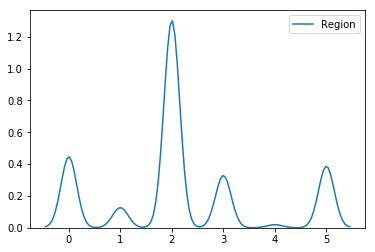

In [38]:
df.Region.replace({'East':0,'West':1,'South':2,'North':3,'Central':4,'Others':5},inplace=True)
sns.kdeplot(df['Region'])

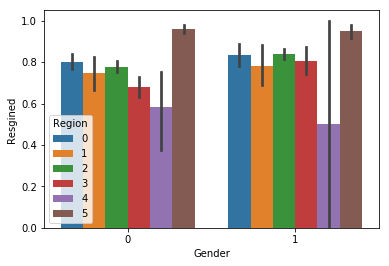

In [39]:
sns.barplot(df['Gender'],df['Resgined'],hue=df['Region'])

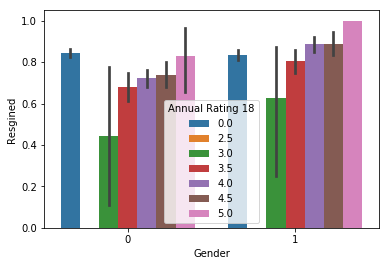

In [40]:
sns.barplot(df['Gender'],df['Resgined'],hue=df['Annual Rating 18'])

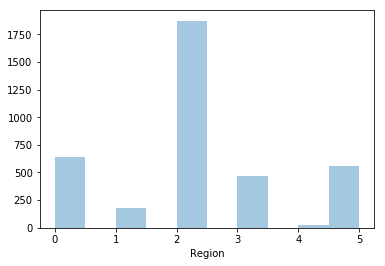

In [41]:
sns.distplot(df['Region'],bins=10,kde=False)

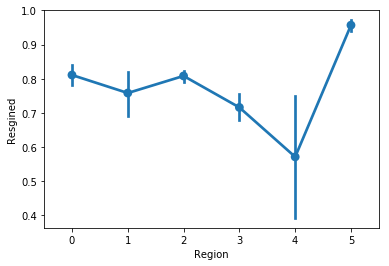

In [42]:
sns.pointplot(df['Region'],df['Resgined'])

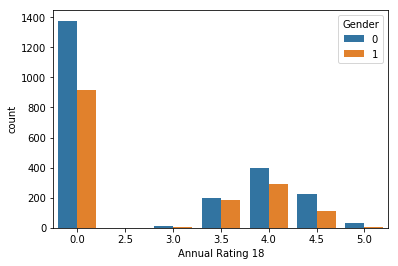

In [43]:
sns.countplot(df['Annual Rating 18'],hue=df['Gender'])

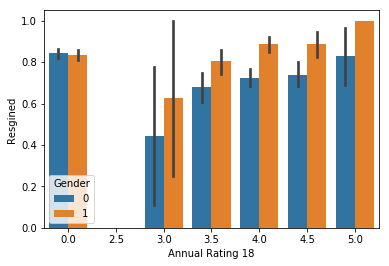

In [44]:
sns.barplot(df['Annual Rating 18'],df['Resgined'],hue=df['Gender'])

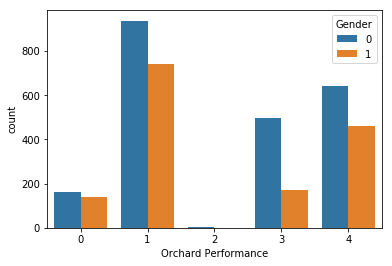

In [45]:
sns.countplot(df['Orchard Performance'],hue=df['Gender'])

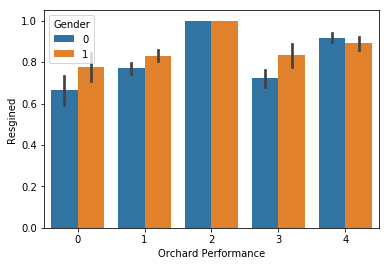

In [46]:
sns.barplot(df['Orchard Performance'],df['Resgined'],hue=df['Gender'])

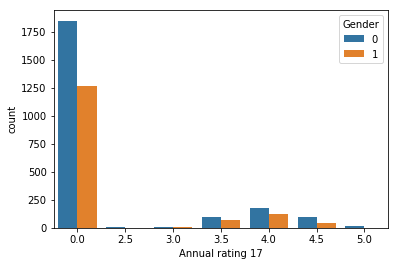

In [47]:
sns.countplot(df['Annual rating 17'],hue=df['Gender'])

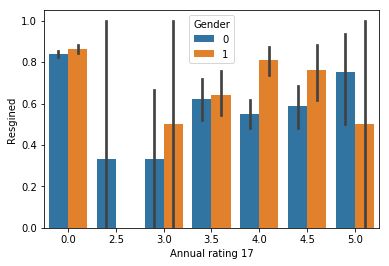

In [48]:
sns.barplot(df['Annual rating 17'],df['Resgined'],hue=df['Gender'])

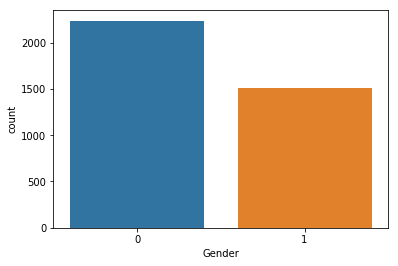

In [49]:
sns.countplot(df['Gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

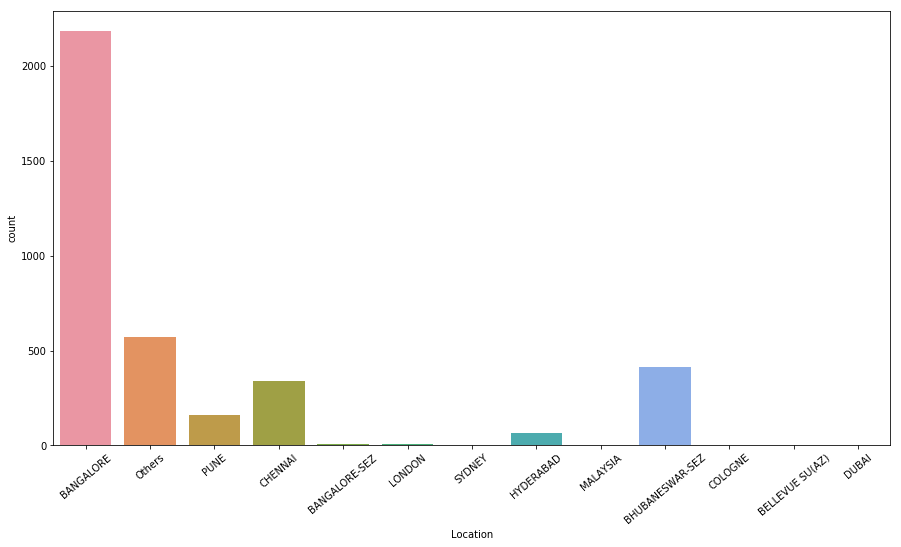

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(df['Location'])
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

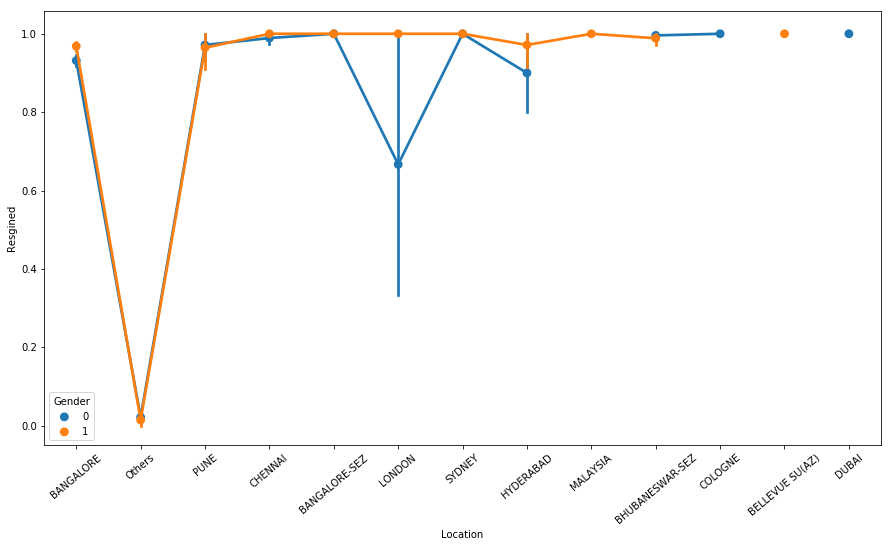

In [51]:
plt.figure(figsize=(15,8))
sns.pointplot(df['Location'],df['Resgined'],hue=df['Gender'])
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

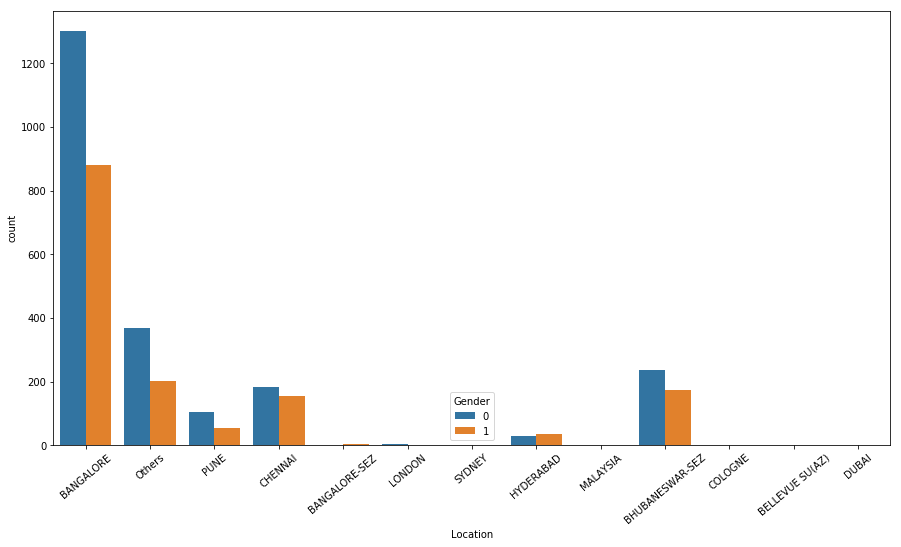

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(df['Location'],hue=df['Gender'])
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

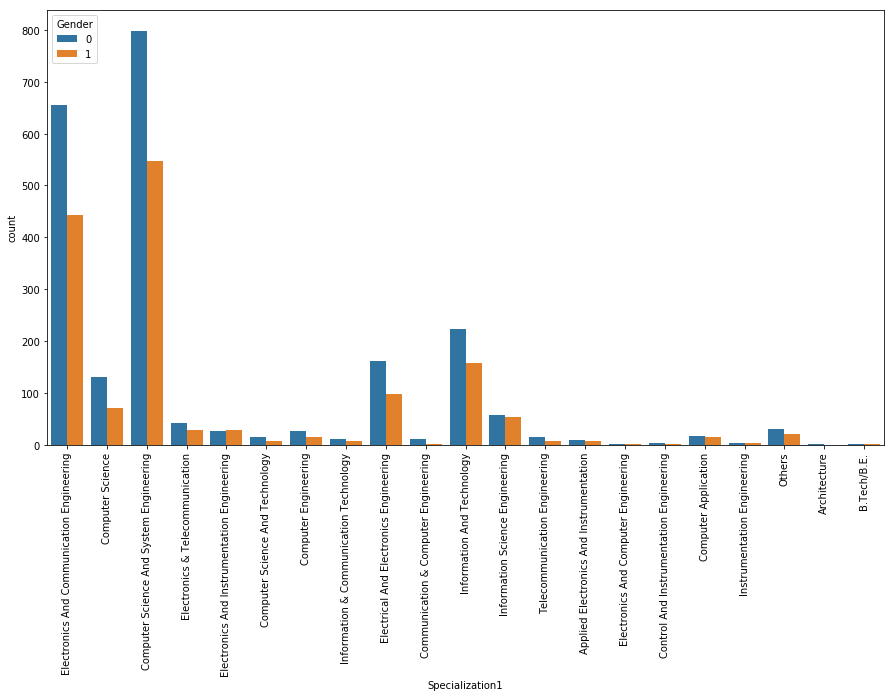

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(df.Specialization1,hue=df['Gender'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

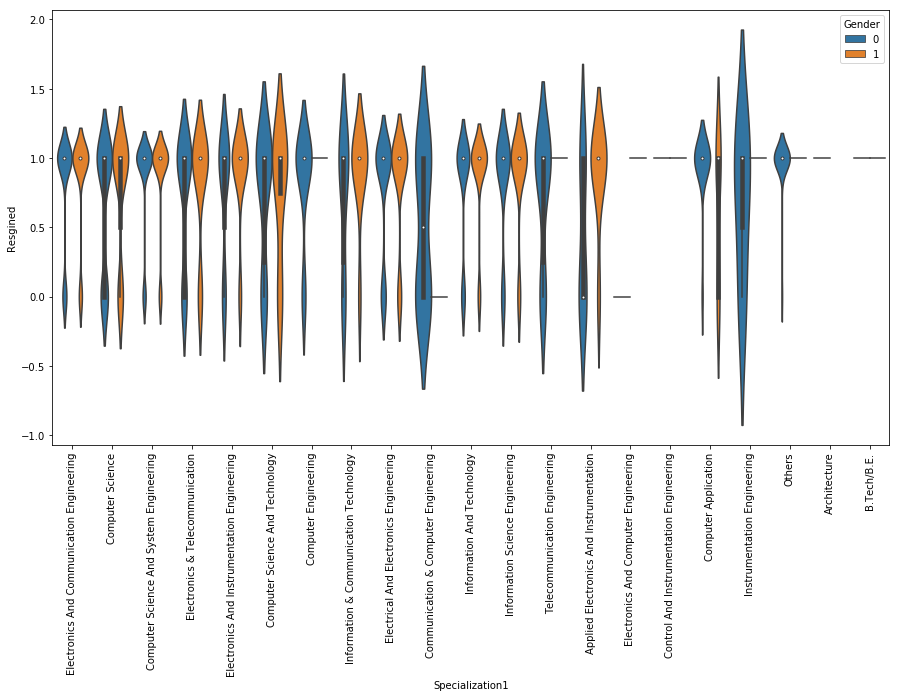

In [54]:
plt.figure(figsize=(15,8))
sns.violinplot(df.Specialization1,df.Resgined,hue=df['Gender'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

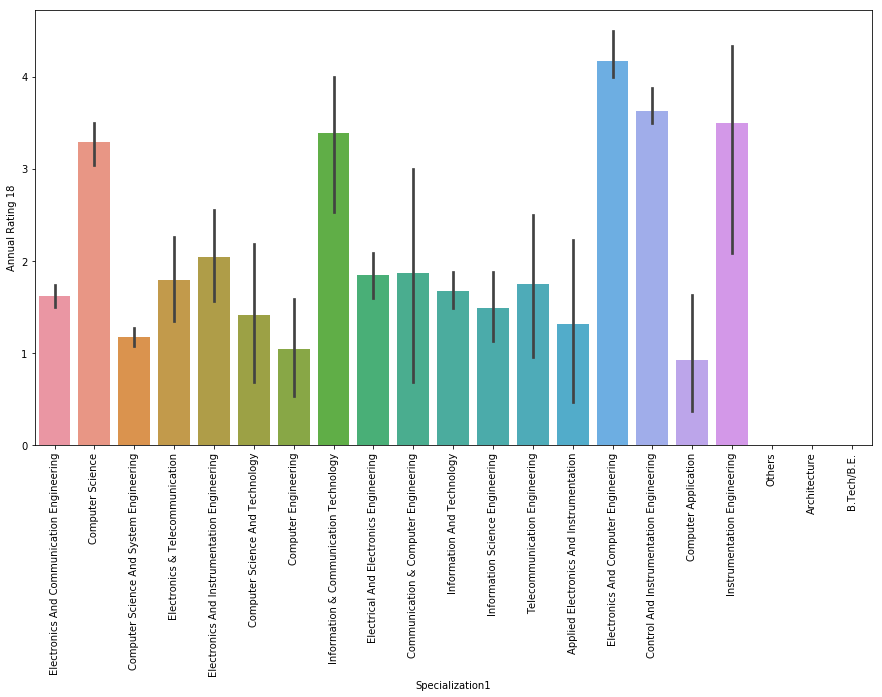

In [55]:
plt.figure(figsize=(15,8))
g = sns.barplot(df.Specialization1,df['Annual Rating 18'])
plt.xticks(rotation=90)

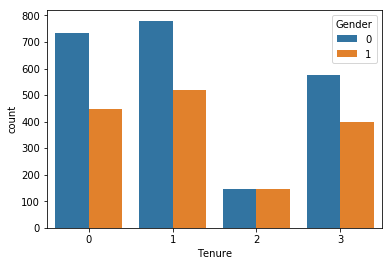

In [56]:
sns.countplot(df.Tenure,hue=df.Gender)

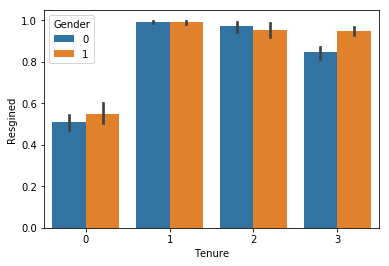

In [57]:
sns.barplot(df.Tenure,df.Resgined,hue=df.Gender)